In [1]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import math
import csv
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
py.sign_in('pongngai', 'nkOGg4Ym3J1JFb6yu27O')
%matplotlib inline

# Task 0: Loading data to DataFrame

In [2]:
#Read CSV file from the url to DataFrame
url = "https://github.com/Brunel-Visualization/Brunel/raw/master/python/examples/data/whiskey.csv"
s = requests.get(url).text
whisky = pd.read_csv(StringIO(s))

# Task 1: Looking around dataset

In [3]:
whisky.shape

(283, 8)

In [4]:
whisky.head()

,Name,Rating,Country,Category,Price,ABV,Age,Brand
0,Canadian Hunter Canadian Whisky,40.0,Canada,Blended,9.0,40.0,NaN,Canadian Hunter
1,Canadian LTD Blended Canadian Whiskey,43.0,Canada,Blended,10.0,NaN,NaN,Canadian LTD
2,Kellan Irish Whiskey,47.0,Ireland,Blended,20.0,40.0,NaN,Kellan
3,Rich & Rare Canadian Whisky,47.0,Canada,Blended,10.0,NaN,NaN,Rich & Rare
4,Canadian Mist Blended Canadian Whisky,48.0,Canada,Blended,12.0,40.0,NaN,Canadian Mist


In [5]:
whisky.describe()

,Rating,Price,ABV,Age
count,272.000000,279.000000,270.000000,174.000000
mean,84.474265,72.483871,44.610444,14.339080
std,11.877887,83.992242,5.883056,6.322267
min,40.000000,2.000000,35.500000,0.000000
25%,80.000000,30.000000,40.000000,10.000000
50%,88.000000,50.000000,43.000000,14.500000
75%,94.000000,80.000000,46.000000,18.000000
max,100.000000,850.000000,68.200000,40.000000


In [6]:
whisky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 8 columns):
Name        283 non-null object
Rating      272 non-null float64
Country     283 non-null object
Category    283 non-null object
Price       279 non-null float64
ABV         270 non-null float64
Age         174 non-null float64
Brand       283 non-null object
dtypes: float64(4), object(4)
memory usage: 17.8+ KB


In [7]:
categories = set(whisky['Category'])
countries = set(whisky['Country'])
names = set(whisky['Name'])
brands = set(whisky['Brand'])

In [8]:
print("Categories:", categories)

Categories: {'Islands', 'Unaged', 'Single Malt', 'Campbeltown', 'Flavored', 'Grain', 'Bourbon', 'Lowlands', 'Blended', 'Corn', 'Rye', 'Islay', 'Pure Pot Still', 'Speyside', 'Highlands'}


In [9]:
print("Counties:", countries)

Counties: {'India', 'Japan', 'England', 'Ireland', 'Taiwan', 'USA', 'France', 'Scotland', 'Canada'}


In [10]:
print("Brands:", brands)

Brands: {'Garrison Brothers', "Bell's", 'Four Roses', 'Knob creek', 'Caol Ila', "Maker's Mark", 'Rich & Rare', 'Tullamore', 'Canadian Hunter', 'Dalwhinnie', 'Forty Creek', 'Leopold Bros.', 'Aberlour', 'Jefferson', "Russell's", 'Ledaig', 'Mickey Finn', 'Copper Fox', 'Oban', 'Bulleit', 'Glengoyne', 'Glen Garioch', 'Connemara', 'Macallan', 'Jim Beam', 'Haig', 'Laphroaig', 'Ardbeg', 'Benchmark', 'Woodford Reserve', 'Catoctin Creek', 'Ellington', 'Eagle', 'Canadian Club', 'Glenmorangie', 'Price Edward', 'Thomas H. Handy', 'Delaware Phoenix', 'Early Times', 'Highland Park', 'Sazerac', 'William Grant & Sons', 'Rebel Yell', 'Canadian LTD', 'Tomatin', 'Redbreast', 'Glenrothes', 'Ardmore', '8 Seconds', 'Bowmore', 'Rogue', 'Bunnahabhain', 'Balvenie', 'George Dickel', "Seagram's", 'William Larue Weller', 'Johnnie Walker', 'Penderyn', 'Barton', 'Balblair', 'Black Velvet', 'Hudson', 'Templeton', 'Kilbeggan', 'Springbank', 'Canadian Mist', 'John L. Sullivan', 'Feckin', 'Deanston', 'A.H. Hirsch', 'Isl

In [11]:
print("First 10 names:", list(names)[:10])

First 10 names: ['Canadian Club Reserve Canadian Whisky', 'Pescadores Pumpkin Whisky', 'Glenmorangie 25 Year Old Single Malt Scotch', 'Bowmore 25 Year Old Scotch', 'Aberlour 16 Year Old Single Malt Scotch', 'Amrut Indian Single Malt Whisky Cask Strength', 'A.H. Hirsch Finest Reserve 20 Bourbon', "Russell's Reserve 6 Year Old Straight Rye Whiskey", 'Tyrconnell Single Malt Irish Whiskey', 'Old Parr 12 Year Old Blended Scotch']


# Task 2: Investigate missing data

In [12]:
data = whisky.values

In [13]:
#columns 1, 4 - 6 are numeric
x = np.concatenate((data[:,1].reshape(-1,1), data[:,4:7]),axis=1)
print(x.shape)

(283, 4)


In [14]:
#Find median of each numeric attribute
med_rating = np.median([xx for xx in x[:,0] if not math.isnan(xx)])
med_price = np.median([xx for xx in x[:,1] if not math.isnan(xx)])
med_avb = np.median([xx for xx in x[:,2] if not math.isnan(xx)])
med_age = np.median([xx for xx in x[:,3] if not math.isnan(xx)])

print("Median's rating:", med_rating)
print("Median's price:", med_price)
print("Median's avb:", med_avb)
print("Median's age:", med_age)

Median's rating: 88.0
Median's price: 50.0
Median's avb: 43.0
Median's age: 14.5


In [15]:
#replace nan with median
rating = np.array([med_rating if math.isnan(xx) else xx for xx in x[:,0]]).reshape(-1,1)
price = np.array([med_price if math.isnan(xx) else xx for xx in x[:,1]]).reshape(-1,1)
avb = np.array([med_avb if math.isnan(xx) else xx for xx in x[:,2]]).reshape(-1,1)
age = np.array([med_age if math.isnan(xx) else xx for xx in x[:,3]]).reshape(-1,1)
replace_x = np.concatenate((rating, price, avb, age), axis=1)
print("Median after replacing:",np.median(replace_x,axis=0))

Median after replacing: [88.  50.  43.  14.5]


# Task 3: Investigate missing data

In [16]:
def outlier(x):
    rating_q1 = np.percentile(x,25)
    rating_q3 = np.percentile(x,75)
    IQR = rating_q3 - rating_q1
    lower_outlier = rating_q1 - (1.5*IQR)
    higher_outlier = rating_q3 + (1.5*IQR)
    return (lower_outlier, higher_outlier)

In [17]:
#Define the function that return index of outliers
def del_outlier(x):
    l, h = outlier(x)
    return [i for i,xx in enumerate(x) if xx < l or xx > h], l, h

In [18]:
#Create index of outlier in each attribute
rating_idx, lrate, hrate = del_outlier(x[:,0])
price_idx, lprice, hprice = del_outlier(x[:,1])
avb_idx, lavb, havb = del_outlier(x[:,2])
age_idx, lage, hage = del_outlier(x[:,3])

In [19]:
print("Rating => lower outlier:", lrate, ",upper outlier:", hrate)
print("Price => lower outlier:", lprice, ",upper outlier:", hprice)
print("AVB => lower outlier:", lavb, ",upper outlier:", havb)
print("Age => lower outlier:", lage, ",upper outlier:", hage)

Rating => lower outlier: 57.25 ,upper outlier: 115.25
Price => lower outlier: nan ,upper outlier: nan
AVB => lower outlier: 31.0 ,upper outlier: 55.0
Age => lower outlier: nan ,upper outlier: nan


In [20]:
print("Rating outlier index:", rating_idx,"\n")
print("Price outlier index:", price_idx,"\n")
print("AVB outlier index:", avb_idx,"\n")
print("Age outlier index:", age_idx,"\n")
outlier_idx = set(np.concatenate((rating_idx, price_idx, avb_idx, age_idx)))
print("All outlier index: ", outlier_idx)

Rating outlier index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] 

Price outlier index: [] 

AVB outlier index: [59, 67, 68, 75, 88, 136, 137, 143, 144, 154, 174, 188, 207, 222, 225, 239, 244, 266, 268, 269, 276, 282] 

Age outlier index: [] 

All outlier index:  {0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 136.0, 137.0, 143.0, 144.0, 266.0, 268.0, 269.0, 276.0, 154.0, 282.0, 174.0, 59.0, 188.0, 67.0, 68.0, 75.0, 207.0, 88.0, 222.0, 225.0, 239.0, 244.0}


# Task 4: Plot

In [21]:
#Zzzzz
#call dataframe for histogram (fr)
whiskeydf =pd.read_csv("https://github.com/Brunel-Visualization/Brunel/raw/master/python/examples/data/whiskey.csv")

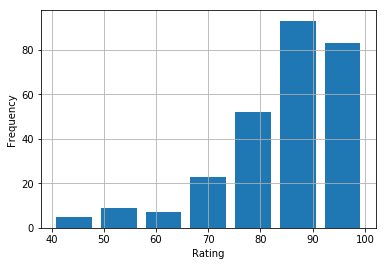

In [22]:
###histogram for Rating bin size = 7
whiskeydf.Rating.hist(bins=7, rwidth=0.8);
plt.xlabel('Rating');
plt.ylabel('Frequency');

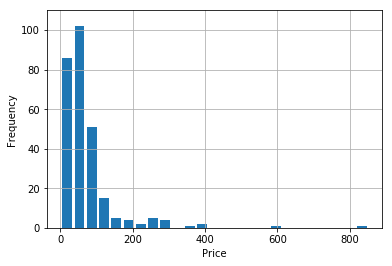

In [23]:
###histogram for Rating bin size = 25
whiskeydf.Price.hist(bins=25, rwidth=0.8);
plt.xlabel('Price');
plt.ylabel('Frequency');
plt.ylim([0,110]);

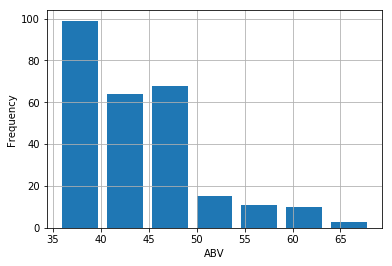

In [24]:
###histogram for ABV bin size = 7
whiskeydf.ABV.hist(bins=7, rwidth=0.8);
plt.xlabel('ABV');
plt.ylabel('Frequency');

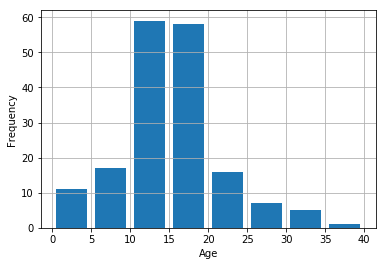

In [25]:
###histogram for Age bin size = 8
whiskeydf.Age.hist(bins=8, rwidth=0.8);
plt.xlabel('Age');
plt.ylabel('Frequency');

In [26]:
# Box plot Rating
trace1 = {
  "y": ["64.0", "64.0", "65.0", "65.0", "67.0", "67.0", "67.0", "67.0", "68.0", "68.0", "69.0", "69.0", "69.0", "70.0", "70.0", "71.0", "71.0", "73.0", "73.0", "74.0", "74.0", "74.0", "74.0", "75.0", "76.0", "76.0", "76.0", "76.0", "77.0", "77.0", "77.0", "77.0", "78.0", "78.0", "78.0", "79.0", "79.0", "79.0", "79.0", "80.0", "80.0", "80.0", "80.0", "81.0", "81.0", "81.0", "81.0", "81.0", "81.0", "81.0", "81.0", "81.0", "81.0", "81.0", "81.0", "81.0", "81.0", "82.0", "82.0", "82.0", "82.0", "82.0", "82.0", "83.0", "83.0", "83.0", "83.0", "83.0", "83.0", "83.0", "84.0", "84.0", "84.0", "84.0", "85.0", "85.0", "85.0", "85.0", "85.0", "85.0", "85.0", "86.0", "86.0", "86.0", "86.0", "86.0", "86.0", "86.0", "86.0", "86.0", "87.0", "87.0", "87.0", "87.0", "87.0", "87.0", "87.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0", "89.0", "89.0", "89.0", "90.0", "90.0", "90.0", "90.0", "90.0", "90.0", "90.0", "90.0", "90.0", "91.0", "91.0", "92.0", "92.0", "92.0", "92.0", "92.0", "92.0", "92.0", "92.0", "92.0", "93.0", "93.0", "93.0", "94.0", "94.0", "94.0", "94.0", "94.0", "94.0", "94.0", "94.0", "95.0", "95.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "96.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "99.0", "100.0", "88.0", "88.0", "88.0", "88.0", "88.0", "88.0"], 
  "boxpoints": False, 
  "name": "Rating", 
  "orientation": "v", 
  "type": "box", 
  "ysrc": "pongngai:12:de8bc1"
}
data = go.Data([trace1])
layout = {
  "autosize": True, 
  "hovermode": "closest", 
  "title": "Whiskey", 
  "xaxis": {
    "autorange": False, 
    "range": [-0.427950310559, 0.572049689441], 
    "showspikes": False, 
    "title": "", 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": False, 
    "range": [62, 102], 
    "showspikes": False, 
    "title": "Score", 
    "type": "linear"
  }
}
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Rating_boxplot', sharing='public')

C:\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [27]:
#Box plot price
trace2 = {
  "y": ["30.0", "20.0", "24.0", "25.0", "50.0", "60.0", "65.0", "14.0", "25.0", "12.0", "23.0", "23.0", "20.0", "45.0", "26.0", "27.0", "50.0", "84.0", "90.0", "90.0", "40.0", "50.0", "58.0", "85.0", "36.0", "70.0", "16.0", "45.0", "50.0", "28.0", "70.0", "20.0", "75.0", "17.0", "73.0", "32.0", "41.0", "26.0", "27.0", "16.0", "63.0", "25.0", "36.0", "20.0", "43.0", "58.0", "20.0", "35.0", "25.0", "40.0", "60.0", "55.0", "69.0", "25.0", "17.0", "50.0", "28.0", "50.0", "70.0", "100.0", "19.0", "17.0", "100.0", "28.0", "33.0", "42.0", "70.0", "35.0", "65.0", "60.0", "25.0", "47.0", "100.0", "43.0", "34.0", "68.0", "98.0", "65.0", "39.0", "95.0", "36.0", "61.0", "24.0", "50.0", "43.0", "43.0", "20.0", "24.0", "40.0", "49.0", "20.0", "50.0", "60.0", "50.0", "49.0", "53.0", "40.0", "32.0", "60.0", "100.0", "35.0", "48.0", "40.0", "45.0", "25.0", "48.0", "40.0", "61.0", "75.0", "21.0", "53.0", "128.0", "27.0", "34.0", "50.0", "125.0", "65.0", "35.0", "90.0", "140.0", "79.0", "70.0", "45.0", "37.0", "70.0", "55.0", "90.0", "29.0", "64.0", "75.0", "67.0", "94.0", "70.0", "40.0", "47.0", "45.0", "57.0", "109.0", "47.0", "39.0", "35.0", "32.0", "108.0", "107.0", "60.0", "115.0", "68.0", "80.0", "45.0", "42.0", "47.0", "55.0", "70.0", "50.0", "80.0", "84.0", "30.0", "43.0", "89.0", "62.0", "73.0", "30.0", "79.0", "43.0", "54.0", "48.0", "25.0", "30.0", "40.0", "65.0", "64.0", "40.0", "35.0", "120.0", "42.0", "80.0", "92.0", "107.0", "45.0", "100.0", "60.0", "70.0", "50.0", "45.0", "45.0", "70.0", "11.0", "58.0", "80.0", "72.0", "92.0", "8.0", "50.0", "50.0", "30.0", "40.0"], 
  "boxpoints": False, 
  "line": {"color": "rgb(180, 104, 31)"}, 
  "name": "Price", 
  "type": "box", 
  "ysrc": "pongngai:14:c7bca7"
}
data = go.Data([trace2])
layout = {
  "autosize": True, 
  "hovermode": "closest", 
  "title": "Whiskey", 
  "xaxis": {
    "autorange": True, 
    "range": [-0.5, 0.5], 
    "title": "", 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [0.666666666667, 147.333333333], 
    "title": "US dollar", 
    "type": "linear"
  }
}
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='Price_boxplot', sharing='public')

In [28]:
#Box plot ABV
trace3 = {
  "y": ["40.0", "40.0", "40.0", "40.0", "43.0", "40.0", "40.0", "40.0", "40.0", "40.0", "40.0", "40.0", "40.0", "43.0", "40.0", "40.0", "43.0", "40.0", "40.0", "46.0", "40.0", "45.0", "40.0", "43.0", "46.0", "46.0", "40.0", "40.0", "43.0", "40.0", "46.0", "50.0", "45.0", "40.0", "40.0", "40.0", "46.0", "43.0", "40.0", "43.0", "43.0", "43.0", "40.0", "40.0", "46.0", "43.0", "40.0", "42.5", "40.0", "40.0", "42.0", "41.0", "40.0", "40.0", "41.0", "40.0", "40.0", "40.0", "40.0", "43.0", "50.0", "40.0", "43.0", "46.0", "43.0", "46.0", "45.0", "47.0", "43.0", "43.0", "40.0", "40.0", "40.0", "40.0", "46.0", "43.0", "54.7", "50.0", "40.0", "46.0", "40.0", "40.0", "40.0", "40.0", "43.0", "43.0", "43.0", "45.0", "40.0", "47.8", "45.0", "40.0", "43.0", "43.0", "47.0", "50.0", "45.0", "40.0", "40.0", "43.0", "40.0", "43.0", "40.0", "46.0", "42.0", "40.0", "40.0", "46.0", "47.0", "50.0", "43.0", "43.0", "45.0", "45.0", "47.0", "50.0", "43.0", "40.0", "47.0", "40.0", "43.0", "43.0", "43.0", "54.1", "43.0", "40.0", "47.0", "43.0", "40.0", "46.0", "46.0", "46.0", "40.0", "40.0", "46.3", "40.0", "45.0", "43.0", "48.0", "40.0", "45.0", "45.0", "46.3", "43.0", "46.0", "46.0", "45.82", "43.0", "43.0", "50.5", "40.0", "46.0", "45.0", "50.05", "46.2", "46.0", "47.5", "40.0", "43.0", "46.0", "43.0", "40.0", "43.0", "46.3", "40.0", "43.0", "40.0", "40.0", "40.0", "48.0", "40.0", "46.0", "40.0", "43.0", "40.0", "46.0", "46.3", "48.0", "40.0", "43.0", "43.0", "43.0", "40.0", "40.0", "48.0", "43.0", "40.0", "53.5", "54.2", "46.0", "43.0", "43.0", "43.0", "43.0", "46.0", "45.0"], 
  "boxpoints": False, 
  "line": {"color": "rgb(180, 31, 70)"}, 
  "name": "ABV", 
  "orientation": "v", 
  "type": "box", 
  "ysrc": "pongngai:16:9fe409"
}
data = go.Data([trace3])
layout = {
  "autosize": True, 
  "hovermode": "closest", 
  "title": "Whiskey", 
  "xaxis": {
    "autorange": True, 
    "range": [-0.5, 0.5], 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [39.1833333333, 55.5166666667], 
    "title": "Volume", 
    "type": "linear"
  }
}
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='ABV_boxplot',sharing='public')

In [29]:
#Box plot age
trace4 = {
  "y": ["14.5", "14.5", "14.5", "14.5", "15.0", "14.5", "18.0", "8.0", "14.5", "14.5", "14.5", "12.0", "14.5", "12.0", "14.5", "8.0", "8.0", "18.0", "12.0", "14.5", "10.0", "14.5", "19.0", "10.0", "14.5", "14.5", "14.5", "15.0", "15.0", "12.0", "14.5", "8.0", "18.0", "14.5", "18.0", "11.0", "14.5", "12.0", "14.5", "14.5", "16.0", "12.0", "8.0", "14.5", "14.5", "14.5", "14.5", "14.5", "14.5", "14.5", "14.5", "14.5", "10.0", "14.5", "8.0", "10.0", "14.5", "14.5", "14.5", "18.0", "14.5", "14.5", "19.0", "14.5", "14.5", "14.5", "14.5", "14.5", "14.0", "10.0", "12.0", "10.0", "15.0", "12.0", "14.5", "16.0", "18.0", "14.5", "10.0", "15.0", "14.5", "14.5", "14.5", "10.0", "12.0", "12.0", "8.0", "14.5", "12.0", "15.0", "14.5", "12.0", "10.0", "10.0", "14.5", "10.0", "14.5", "14.5", "14.5", "15.0", "14.5", "14.5", "14.5", "14.5", "14.5", "14.5", "12.0", "14.5", "14.5", "14.5", "12.0", "17.0", "14.5", "14.5", "12.0", "15.0", "16.0", "12.0", "18.0", "14.5", "18.0", "15.0", "12.0", "14.5", "18.0", "15.0", "17.0", "10.0", "16.0", "14.5", "15.0", "17.0", "14.5", "12.0", "12.0", "15.0", "17.0", "17.0", "14.5", "10.0", "10.0", "14.5", "15.0", "18.0", "16.0", "16.0", "12.0", "18.0", "12.0", "14.5", "10.0", "12.0", "14.5", "12.0", "14.5", "14.5", "14.5", "12.0", "15.0", "18.0", "17.0", "12.0", "18.0", "12.0", "14.5", "15.0", "14.5", "12.0", "12.0", "16.0", "18.0", "14.5", "12.0", "18.0", "10.0", "10.0", "18.0", "18.0", "12.0", "18.0", "14.0", "14.5", "17.0", "12.0", "14.5", "15.0", "14.5", "15.0", "14.5", "10.0", "12.0", "14.5", "14.5", "10.0", "12.0", "18.0"], 
  "boxpoints": False, 
  "line": {"color": "rgb(31, 180, 65)"}, 
  "name": "Age", 
  "type": "box", 
  "ysrc": "pongngai:18:1e5aff"
}
data = go.Data([trace4])
layout = {
  "autosize": True, 
  "hovermode": "closest", 
  "title": "Whiskey", 
  "xaxis": {
    "autorange": True, 
    "range": [-0.5, 0.5], 
    "title": "Click to enter X axis title", 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [7.38888888889, 19.6111111111], 
    "title": "Year", 
    "type": "linear"
  }
}
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='Age_boxplot',sharing='public')

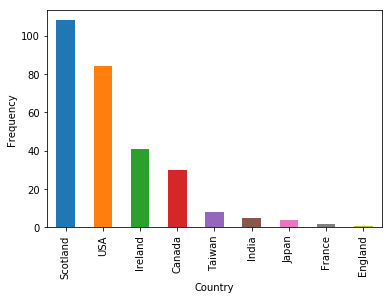

In [30]:
###histogram for Country 
whiskeydf['Country'].value_counts().plot.bar();
plt.xlabel('Country');
plt.ylabel('Frequency');

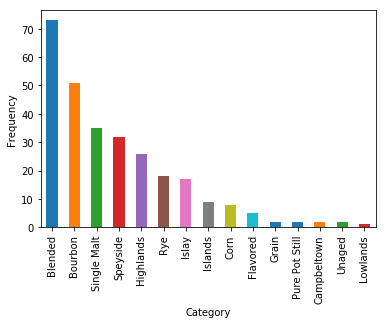

In [31]:
###histogram for Category
whiskeydf['Category'].value_counts().plot.bar();
plt.xlabel('Category');
plt.ylabel('Frequency');

# Task 5: Discover pattern

- Bourbon age >= 4
- Rye age >= 2

In [32]:
#bourbon age must >= 4 years
bour_idx = [i for i, x in whisky.iterrows() if x['Category'] == 'Bourbon' and x['Age'] < 4]

#rye age must >= 2 years
rye_idx = [i for i, x in whisky.iterrows() if x['Category'] == 'Rye' and x['Age'] < 2]

In [33]:
print("less than 4 yrs Bourbon index:", bour_idx)
print("less than 2 yrs Rye index:", rye_idx)

less than 4 yrs Bourbon index: [155]
less than 2 yrs Rye index: [45, 228]


We decided to change the code by computing outlier before replaceing missing values with medians. 

In [34]:
rating_idx, lrate, hrate = del_outlier([xx for xx in x[:,0] if not math.isnan(xx)])
price_idx, lprice, hprice = del_outlier([xx for xx in x[:,1] if not math.isnan(xx)])
avb_idx, lavb, havb = del_outlier([xx for xx in x[:,2] if not math.isnan(xx)])
age_idx, lage, hage = del_outlier([xx for xx in x[:,3] if not math.isnan(xx)])

print("Rating => lower outlier:", lrate, ",upper outlier:", hrate)
print("Price => lower outlier:", lprice, ",upper outlier:", hprice)
print("AVB => lower outlier:", lavb, ",upper outlier:", havb)
print("Age => lower outlier:", lage, ",upper outlier:", hage)

Rating => lower outlier: 59.0 ,upper outlier: 115.0
Price => lower outlier: -45.0 ,upper outlier: 155.0
AVB => lower outlier: 31.0 ,upper outlier: 55.0
Age => lower outlier: -2.0 ,upper outlier: 30.0


In [35]:
print("Rating outlier index:", rating_idx,"\n")
print("Price outlier index:", price_idx,"\n")
print("AVB outlier index:", avb_idx,"\n")
print("Age outlier index:", age_idx,"\n")
outlier_idx = list(set(np.concatenate((rating_idx, price_idx, avb_idx, age_idx))))
print("All outlier index: ", outlier_idx)

Rating outlier index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] 

Price outlier index: [53, 97, 105, 108, 141, 150, 165, 166, 168, 169, 170, 184, 207, 212, 218, 223, 224, 230, 239, 269, 273, 276] 

AVB outlier index: [52, 60, 61, 68, 81, 127, 128, 134, 135, 145, 164, 178, 197, 212, 215, 229, 234, 256, 258, 259, 264, 269] 

Age outlier index: [82, 98] 

All outlier index:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 141, 269, 273, 145, 258, 276, 150, 259, 128, 134, 164, 165, 166, 168, 169, 170, 135, 256, 264, 178, 52, 53, 184, 60, 61, 68, 197, 207, 81, 82, 212, 215, 218, 223, 224, 97, 98, 229, 230, 105, 234, 108, 239, 127]


In [36]:
idx = list(set(np.concatenate((outlier_idx,bour_idx,rye_idx))))
wk_without_outlier = whisky.drop(idx)

In [37]:
wk_without_outlier

,Name,Rating,Country,Category,Price,ABV,Age,Brand
15,Danfield's Private Reserve Small Batch Canaida...,60.0,Canada,Blended,25.0,NaN,NaN,Danfield
16,Wiser's Small Batch Canadian Whisky,60.0,Canada,Rye,29.0,43.00,NaN,Wiser's
17,8 Seconds Canadian Whiskey,64.0,Canada,Blended,30.0,40.00,NaN,8 Seconds
18,Feckin Irish Whiskey,64.0,Ireland,Blended,20.0,40.00,NaN,Feckin
19,Bushmills Original Irish Whiskey,65.0,Ireland,Blended,24.0,40.00,NaN,Bushmills
20,Jameson Irish Whiskey,65.0,Ireland,Blended,25.0,40.00,NaN,Jameson
21,Templeton Rye Whiskey,67.0,USA,Rye,35.0,40.00,4.0,Templeton
22,Dalwhinnie 15 Year Old Single Malt Scotch,67.0,Scotland,Highlands,50.0,43.00,15.0,Dalwhinnie
23,Forty Creek John K. Hall Small Batch Reserve W...,67.0,Canada,Blended,60.0,40.00,NaN,Forty Creek
24,Wiser's 18 Year Old Canadian Whisky,67.0,Canada,Blended,65.0,40.00,18.0,Wiser's


In [38]:
new_data = wk_without_outlier.values
print(new_data.shape)

(221, 8)


In [39]:
#replacing missing values with median after cutting outliers
new_data[:,1] = np.array([med_rating if math.isnan(xx) else xx for xx in new_data[:,1]])
new_data[:,4] = np.array([med_price if math.isnan(xx) else xx for xx in new_data[:,4]])
new_data[:,5] = np.array([med_avb if math.isnan(xx) else xx for xx in new_data[:,5]])
new_data[:,6] = np.array([med_age if math.isnan(xx) else xx for xx in new_data[:,6]])

In [40]:
print("Rating")
print(new_data[:,1])

Rating
[60.0 60.0 64.0 64.0 65.0 65.0 67.0 67.0 67.0 67.0 67.0 68.0 68.0 69.0
 69.0 69.0 69.0 69.0 70.0 70.0 71.0 71.0 72.0 73.0 73.0 74.0 74.0 74.0
 74.0 75.0 76.0 76.0 76.0 76.0 76.0 77.0 77.0 77.0 78.0 78.0 78.0 78.0
 79.0 79.0 80.0 80.0 80.0 80.0 80.0 81.0 81.0 81.0 81.0 81.0 81.0 81.0
 81.0 81.0 81.0 81.0 81.0 81.0 81.0 81.0 81.0 82.0 82.0 82.0 82.0 82.0
 82.0 82.0 82.0 83.0 83.0 83.0 83.0 83.0 83.0 84.0 84.0 84.0 84.0 85.0
 85.0 85.0 85.0 85.0 85.0 85.0 85.0 86.0 86.0 86.0 86.0 86.0 86.0 86.0
 86.0 86.0 87.0 87.0 87.0 87.0 87.0 88.0 88.0 88.0 88.0 88.0 88.0 88.0
 88.0 88.0 88.0 88.0 88.0 88.0 88.0 88.0 88.0 88.0 88.0 88.0 88.0 88.0
 88.0 88.0 88.0 89.0 90.0 90.0 90.0 90.0 90.0 90.0 90.0 90.0 90.0 90.0
 90.0 91.0 91.0 91.0 91.0 91.0 92.0 92.0 92.0 92.0 92.0 92.0 92.0 92.0
 93.0 93.0 93.0 93.0 94.0 94.0 94.0 94.0 94.0 94.0 94.0 94.0 94.0 94.0
 94.0 94.0 95.0 95.0 96.0 96.0 96.0 96.0 96.0 96.0 96.0 96.0 96.0 96.0
 96.0 96.0 96.0 96.0 96.0 96.0 96.0 96.0 96.0 96.0 96.0 96.0 97.0 99.0

In [41]:
print("Price")
print(new_data[:,4])

Price
[25.0 29.0 30.0 20.0 24.0 25.0 35.0 50.0 60.0 65.0 14.0 25.0 12.0 23.0
 23.0 15.0 27.0 20.0 45.0 26.0 27.0 50.0 48.0 84.0 90.0 90.0 40.0 50.0
 58.0 85.0 38.0 36.0 70.0 16.0 45.0 50.0 179.0 20.0 75.0 17.0 73.0 65.0
 26.0 27.0 16.0 63.0 25.0 60.0 36.0 20.0 43.0 58.0 20.0 35.0 100.0 25.0
 40.0 60.0 55.0 18.0 25.0 17.0 50.0 28.0 19.0 16.0 50.0 70.0 100.0 19.0
 17.0 133.0 100.0 28.0 42.0 70.0 35.0 65.0 60.0 25.0 199.0 100.0 160.0
 34.0 68.0 98.0 65.0 100.0 39.0 95.0 36.0 61.0 24.0 50.0 43.0 43.0 20.0
 24.0 40.0 49.0 30.0 60.0 50.0 49.0 53.0 59.0 75.0 32.0 60.0 100.0 30.0
 220.0 117.0 40.0 45.0 25.0 48.0 40.0 850.0 61.0 37.0 75.0 21.0 53.0 128.0
 27.0 34.0 50.0 125.0 250.0 256.0 240.0 140.0 63.0 79.0 70.0 45.0 70.0
 55.0 90.0 29.0 64.0 75.0 400.0 120.0 50.0 67.0 94.0 70.0 40.0 47.0 45.0
 57.0 109.0 39.0 133.0 35.0 32.0 108.0 107.0 60.0 93.0 95.0 140.0 175.0
 115.0 150.0 80.0 190.0 42.0 120.0 55.0 220.0 70.0 80.0 300.0 365.0 84.0
 89.0 400.0 62.0 30.0 79.0 43.0 54.0 48.0 580.0 25.0 30.0

In [42]:
print("AVB")
print(new_data[:,5])

AVB
[43.0 43.0 40.0 40.0 40.0 40.0 40.0 43.0 40.0 40.0 40.0 40.0 40.0 40.0
 40.0 40.0 45.0 40.0 43.0 40.0 40.0 43.0 46.0 40.0 40.0 46.0 40.0 45.0
 40.0 43.0 53.0 46.0 46.0 40.0 40.0 43.0 43.0 50.0 45.0 40.0 40.0 58.0
 43.0 40.0 43.0 43.0 43.0 62.0 40.0 40.0 46.0 43.0 40.0 42.5 58.2 40.0
 40.0 42.0 41.0 40.0 40.0 41.0 40.0 40.0 43.0 62.5 40.0 40.0 43.0 50.0
 40.0 53.0 43.0 46.0 46.0 45.0 47.0 43.0 43.0 40.0 40.0 40.0 43.0 46.0
 43.0 54.7 50.0 47.5 40.0 46.0 40.0 40.0 40.0 40.0 43.0 43.0 43.0 45.0
 40.0 47.8 45.0 43.0 43.0 47.0 50.0 63.0 58.0 40.0 40.0 43.0 40.0 58.3
 58.7 40.0 46.0 42.0 40.0 40.0 43.0 46.0 60.0 47.0 50.0 43.0 43.0 45.0
 45.0 47.0 50.0 42.0 46.0 48.1 40.0 59.5 43.0 43.0 43.0 43.0 40.0 47.0
 43.0 40.0 46.0 43.0 40.0 61.8 46.0 46.0 40.0 40.0 46.3 40.0 45.0 43.0
 40.0 40.0 45.0 45.0 46.3 43.0 46.0 45.2 40.0 44.0 40.0 46.0 40.0 43.0
 43.0 50.5 46.0 46.0 43.0 45.0 63.0 56.5 48.1 46.0 43.0 44.0 46.0 40.0
 43.0 46.3 40.0 43.0 43.0 40.0 40.0 65.0 40.0 48.0 40.0 46.0 40.0 40.0
 4

In [43]:
print("Age")
print(new_data[:,6])

Age
[14.5 14.5 14.5 14.5 14.5 14.5 4.0 15.0 14.5 18.0 8.0 14.5 14.5 14.5 12.0
 4.0 6.0 14.5 12.0 14.5 8.0 8.0 30.0 18.0 12.0 14.5 10.0 14.5 19.0 10.0
 7.0 14.5 14.5 14.5 15.0 15.0 17.0 8.0 18.0 14.5 18.0 14.5 12.0 14.5 14.5
 16.0 12.0 7.0 8.0 14.5 14.5 14.5 14.5 14.5 14.5 14.5 14.5 14.5 14.5 4.0
 14.5 8.0 10.0 14.5 4.0 14.5 14.5 14.5 18.0 14.5 14.5 21.0 19.0 14.5 14.5
 14.5 14.5 14.0 10.0 12.0 12.0 15.0 21.0 14.5 16.0 18.0 14.5 23.0 10.0
 15.0 14.5 14.5 14.5 10.0 12.0 12.0 8.0 14.5 12.0 15.0 23.0 10.0 10.0 14.5
 10.0 14.5 14.5 14.5 14.5 15.0 0.0 14.5 14.5 14.5 14.5 14.5 14.5 12.0 30.0
 14.5 9.0 14.5 14.5 12.0 17.0 14.5 14.5 12.0 15.0 14.5 18.0 25.0 14.5 21.0
 18.0 15.0 12.0 18.0 15.0 17.0 10.0 16.0 14.5 31.0 21.0 14.5 15.0 17.0
 14.5 12.0 12.0 15.0 17.0 17.0 10.0 21.0 10.0 14.5 15.0 18.0 16.0 20.0
 21.0 21.0 21.0 16.0 21.0 18.0 25.0 14.5 21.0 12.0 21.0 14.5 10.0 21.0
 30.0 14.5 15.0 30.0 18.0 12.0 18.0 12.0 14.5 15.0 25.0 14.5 12.0 14.5
 12.0 16.0 18.0 14.5 21.0 12.0 18.0 10.0 10.0 18.

# Task 6: Drop unique attributes
- Name is an unique attribue.

In [44]:
new_data = new_data[:, 1:]

# Task 7: find attributes that has very little effect on Rating

In [45]:
#convert nominal data to numeric data#convert
lb_encoder = LabelEncoder()
new_data[:, 1] = lb_encoder.fit_transform(new_data[:, 1])
new_data[:, 2]  = lb_encoder.fit_transform(new_data[:, 2])
new_data[:, 6]  = lb_encoder.fit_transform(new_data[:, 6])

In [46]:
print("Country")
print(new_data[:, 1])

print("Category")
print(new_data[:, 2])

print("Brand")
print(new_data[:, 6])

Country
[0 0 0 3 3 3 7 5 0 0 0 0 7 0 0 7 7 5 5 3 0 3 5 3 3 3 3 0 5 0 7 2 2 7 5 0 5
 7 7 5 5 3 7 0 0 5 7 7 7 7 7 5 3 7 6 3 1 1 0 7 3 7 3 0 7 7 6 6 5 7 7 7 5 7
 7 0 7 5 5 3 5 3 5 7 5 5 2 7 3 5 7 3 3 3 5 4 7 7 5 5 7 3 5 7 7 7 3 7 0 3 7
 6 6 7 7 6 7 5 5 5 7 7 7 5 5 7 7 7 7 5 3 5 5 5 5 5 4 5 5 7 5 3 5 5 3 2 3 5
 0 5 5 5 7 5 3 5 7 7 5 5 5 7 7 5 5 5 5 5 5 7 5 5 5 7 7 5 5 6 5 5 5 5 5 5 5
 5 5 5 5 7 3 5 5 7 5 3 4 5 5 5 5 5 5 5 5 5 7 7 5 7 3 5 4 0 5 5 5 5 7 7 6]
Category
[0 11 0 0 0 0 11 6 0 0 0 0 1 0 0 1 11 0 0 0 0 5 13 0 12 0 12 0 0 12 1 12
 12 1 0 12 13 1 11 0 0 12 3 0 11 7 1 1 1 1 12 6 0 4 12 4 0 12 11 4 0 1 12
 0 1 3 12 12 0 1 3 11 13 1 1 0 1 6 8 0 0 0 13 11 8 9 12 11 12 2 1 0 0 0 8
 12 1 1 0 13 1 12 6 1 1 3 12 0 0 12 14 12 12 3 5 4 12 7 13 2 1 1 1 13 13 1
 1 1 1 6 0 7 0 13 13 13 12 13 13 1 13 12 7 13 12 12 10 6 0 6 6 13 1 6 12
 13 1 1 7 6 6 1 1 7 13 8 6 7 8 1 6 6 13 1 1 8 7 12 6 6 13 6 0 8 0 13 6 0 0
 1 10 13 0 1 13 0 12 6 6 8 8 13 0 13 6 8 1 11 8 1 12 6 0 0 8 0 6 0 1 1 12]
Brand
[38 120 0

In [47]:
new_data = np.asarray(new_data, dtype=np.float32)

In [48]:
corr = np.corrcoef(new_data.T)
print("correlation based on rating")
print(corr[0,1:])

correlation based on rating
[0.34655899 0.21534841 0.26449732 0.22670197 0.22945201 0.034608  ]


Last comlumn(brand) has correlation close to 0, so it has a little effect on rating. We'll drop it.

In [49]:
new_data = np.delete(new_data, -1, axis=1)
print(new_data.shape)

(221, 6)


In [50]:
#just look on every 10 data
print(new_data[::10])

[[ 60.    0.    0.   25.   43.   14.5]
 [ 67.    0.    0.   14.   40.    8. ]
 [ 71.    0.    0.   27.   40.    8. ]
 [ 76.    7.    1.   38.   53.    7. ]
 [ 78.    5.    0.   73.   40.   18. ]
 [ 81.    7.   12.   43.   46.   14.5]
 [ 81.    3.    0.   25.   40.   14.5]
 [ 82.    7.    3.   17.   40.   14.5]
 [ 84.    5.    0.  199.   40.   12. ]
 [ 85.    7.    1.   36.   40.   14.5]
 [ 87.    7.    1.   30.   45.   23. ]
 [ 88.    7.   14.   30.   40.    0. ]
 [ 88.    7.    1.   37.   60.    9. ]
 [ 90.    3.    0.  256.   46.   18. ]
 [ 90.    5.   13.   29.   43.   10. ]
 [ 92.    5.    6.   47.   46.3  12. ]
 [ 94.    5.    6.   60.   46.   16. ]
 [ 95.    5.    6.  120.   46.   21. ]
 [ 96.    5.   13.   62.   46.   18. ]
 [ 96.    3.   10.   40.   40.   12. ]
 [ 99.    5.    8.  107.   48.   18. ]
 [100.    3.   12.   72.   46.   10. ]
 [ 88.    6.   12.  100.   59.2  14.5]]


In [51]:
#create new dataframe
cols = ["Rating", "Country", "Category", "Price", "AVB", "Age"]
new_df = pd.DataFrame(new_data, columns=cols)

In [52]:
new_df

,Rating,Country,Category,Price,AVB,Age
0,60.0,0.0,0.0,25.0,43.000000,14.5
1,60.0,0.0,11.0,29.0,43.000000,14.5
2,64.0,0.0,0.0,30.0,40.000000,14.5
3,64.0,3.0,0.0,20.0,40.000000,14.5
4,65.0,3.0,0.0,24.0,40.000000,14.5
5,65.0,3.0,0.0,25.0,40.000000,14.5
6,67.0,7.0,11.0,35.0,40.000000,4.0
7,67.0,5.0,6.0,50.0,43.000000,15.0
8,67.0,0.0,0.0,60.0,40.000000,14.5
9,67.0,0.0,0.0,65.0,40.000000,18.0


In [66]:
new_df.to_csv("df_phase1.csv", index=False,encoding='utf-8')